In [2]:
# import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.simplefilter('ignore')

from auto_learning.models import CLASSIFICATION_MODELS, REGRESSION_MODELS
from auto_learning.hyp_param_search import HypParamSearch

data = load_wine()
# df_x = pd.DataFrame(data=data.data, columns=data.feature_names)
# df_y = pd.DataFrame(data=data.target)

x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3)

ModuleNotFoundError: No module named 'seaborn'

|   iter    |  target   | max_depth | n_esti... |
-------------------------------------------------
|  1        |  0.6104   |  5.098    |  171.5    |
|  2        |  0.5952   |  4.018    |  125.7    |
|  3        |  0.6068   |  5.22     |  167.9    |
|  4        |  0.5987   |  4.0      |  200.0    |
|  5        |  0.605    |  5.962    |  100.0    |
|  6        |  0.5907   |  4.006    |  177.7    |
|  7        |  0.6059   |  5.997    |  199.7    |
|  8        |  0.605    |  5.993    |  114.8    |
|  9        |  0.6086   |  5.99     |  172.0    |
|  10       |  0.5952   |  4.004    |  108.0    |
|  11       |  0.6077   |  5.987    |  140.2    |
|  12       |  0.6005   |  5.97     |  132.7    |
|  13       |  0.5952   |  4.003    |  146.4    |
|  14       |  0.5925   |  4.005    |  170.5    |
|  15       |  0.6122   |  5.988    |  153.7    |
|  16       |  0.6059   |  5.989    |  164.2    |
|  17       |  0.5987   |  4.034    |  191.8    |
|  18       |  0.6077   |  6.0      |  149.5    |


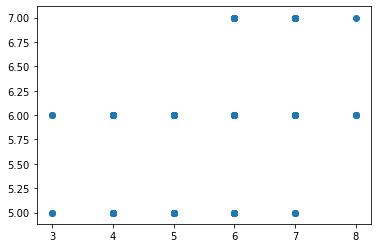

0.6193029490616622 0.6291666666666667


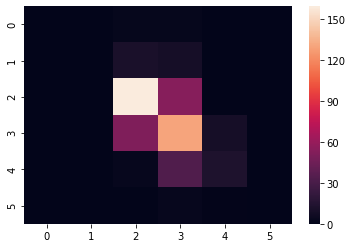

|   iter    |  target   |     C     |   gamma   |
-------------------------------------------------
|  1        |  0.6345   |  1.86     |  0.008769 |
|  2        |  0.4182   | -3.463    | -6.768    |
|  3        |  0.6327   |  1.884    | -0.007375 |
|  4        |  0.5344   |  6.238    |  2.773    |
|  5        |  0.4182   | -3.466    |  2.773    |
|  6        |  0.5925   |  6.238    | -6.931    |
|  7        |  0.6148   |  3.489    | -2.616    |
|  8        |  0.555    |  2.561    | -6.915    |
|  9        |  0.6077   |  2.863    |  0.3708   |
|  10       |  0.622    |  0.5774   | -1.512    |
|  11       |  0.5344   |  1.155    |  2.77     |
|  12       |  0.6345   |  1.49     | -0.577    |
|  13       |  0.5987   |  6.237    | -2.872    |
|  14       |  0.6363   |  0.7931   |  0.003316 |
|  15       |  0.6381   |  1.153    | -0.07369  |
|  16       |  0.6005   |  4.991    | -4.91     |
|  17       |  0.6399   |  1.204    | -0.1082   |
|  18       |  0.4674   | -3.435    | -1.512    |


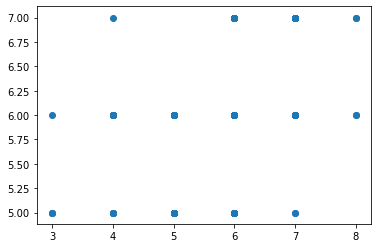

0.6434316353887399 0.6708333333333333


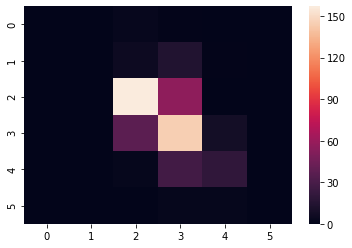

|   iter    |  target   | n_neig... |
-------------------------------------
|  1        |  0.5728   |  9.586    |
|  2        |  0.5576   |  3.001    |
|  3        |  0.5612   |  15.0     |
|  4        |  0.5728   |  9.293    |
|  5        |  0.5728   |  9.355    |
|  6        |  0.5728   |  9.368    |
|  7        |  0.5728   |  9.37     |
|  8        |  0.5728   |  9.389    |
|  9        |  0.5728   |  9.384    |
|  10       |  0.5728   |  9.435    |
|  11       |  0.5728   |  9.407    |
|  12       |  0.5728   |  9.337    |
|  13       |  0.5728   |  9.528    |
|  14       |  0.5728   |  9.074    |
|  15       |  0.5728   |  9.623    |
|  16       |  0.5728   |  9.168    |
|  17       |  0.5728   |  9.658    |
|  18       |  0.5728   |  9.224    |
|  19       |  0.5728   |  9.579    |
|  20       |  0.5728   |  9.184    |
|  21       |  0.5728   |  9.633    |
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=

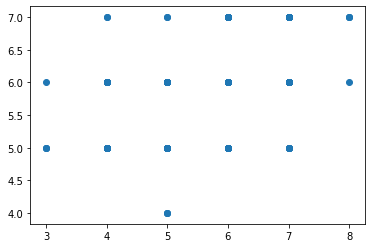

0.5728328865058088 0.5625


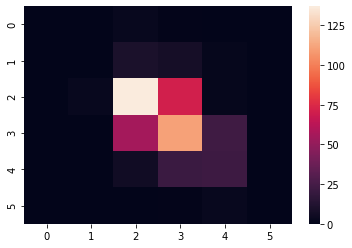

In [3]:
feature_selection = 'None'
crossval_type = 'kfold'
search_type = 'bayes'
metrics = 'accuracy'
problem_type = 'classification'

est_list = []
for func in CLASSIFICATION_MODELS.values():
    est, params = func()
    hyp = HypParamSearch(x_train,
                         y_train,
                         x_test,
                         y_test,
                         est,
                         problem_type,
                         feature_selection,
                         params,
                         crossval_type,
                         search_type,
                         metrics)
    y_test_list, y_test_predicted_list, val_score, test_score, est = hyp.hyp_param_search()
    est_list.append(est)

    print(est)

    plt.figure()
    plt.scatter(y_test_list, y_test_predicted_list)
    plt.show()

    print(val_score, test_score)

    y_test_predicted_list = np.array(y_test_predicted_list, int)
    cm = confusion_matrix(y_test_list, y_test_predicted_list)

    sns.heatmap(cm)
    plt.show()

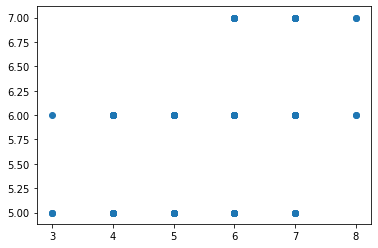

0.6058981233243967 0.6333333333333333


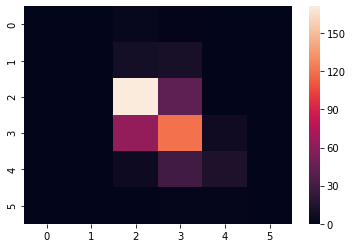

In [4]:
from estimator import StackedGeneralization

def sg(est_list):
    params = {}
    StackedGeneralization.est_list = est_list
    return StackedGeneralization, params

feature_selection = 'None'
crossval_type = 'kfold'
search_type = 'brute'
metrics = 'accuracy'
problem_type = 'classification'

est, params = sg(est_list)
hyp = HypParamSearch(x_train,
                     y_train,
                     x_test,
                     y_test,
                     est,
                     problem_type,
                     feature_selection,
                     params,
                     crossval_type,
                     search_type,
                     metrics)
y_test_list, y_test_predicted_list, val_score, test_score, est = hyp.hyp_param_search()

print(est)

plt.figure()
plt.scatter(y_test_list, y_test_predicted_list)
plt.show()

print(val_score, test_score)

y_test_predicted_list = np.array(y_test_predicted_list, int)
cm = confusion_matrix(y_test_list, y_test_predicted_list)

sns.heatmap(cm)
plt.show()

In [ ]:
from estimator import NeuralNet

def nn():
    params = {'bn1':[0.1,0.9], 'do1':[0.1,0.5], 'bn2':[0.1,0.9], 'do2':[0.1,0.5], 'bn3':[0.1,0.9], 'do3':[0.1,0.5]}
    return NeuralNet, params

feature_selection = 'None'
crossval_type = 'kfold'
search_type = 'bayes'
metrics = 'accuracy'
problem_type = 'classification'

est, params = nn()
hyp = HypParamSearch(x_train,
                     y_train,
                     x_test,
                     y_test,
                     est,
                     problem_type,
                     feature_selection,
                     params,
                     crossval_type,
                     search_type,
                     metrics)
y_test_list, y_test_predicted_list, val_score, test_score, est = hyp.hyp_param_search()

print(est)

plt.figure()
plt.scatter(y_test_list, y_test_predicted_list)
plt.show()

print(val_score, test_score)

y_test_predicted_list = np.array(y_test_predicted_list, int)
cm = confusion_matrix(y_test_list, y_test_predicted_list)

sns.heatmap(cm)
plt.show()

|   iter    |  target   |    bn1    |    bn2    |    bn3    |    do1    |    do2    |    do3    |
-------------------------------------------------------------------------------------------------
|  1        |  0.5308   |  0.5391   |  0.6722   |  0.5822   |  0.318    |  0.2695   |  0.3584   |
|  2        |  0.5719   |  0.1      |  0.1      |  0.1      |  0.1      |  0.1      |  0.1      |
|  3        |  0.5326   |  0.1      |  0.1      |  0.1      |  0.5      |  0.5      |  0.1      |
|  4        |  0.5416   |  0.9      |  0.1      |  0.1      |  0.1      |  0.1      |  0.1      |
|  5        |  0.5398   |  0.1      |  0.1      |  0.9      |  0.1      |  0.1      |  0.1      |
|  6        |  0.5871   |  0.1      |  0.9      |  0.1      |  0.1      |  0.1      |  0.1      |
|  7        |  0.5416   |  0.264    |  0.7733   |  0.1056   |  0.1199   |  0.4004   |  0.4032   |
